In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_size = 28
no_of_different_labels = 10 
image_pixels = image_size * image_size

In [ ]:
data_path = "data/mnist/"

In [ ]:
data_path

'data/mnist/'

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x,y = mnist['data'],mnist['target']
x.shape


(70000, 784)

In [ ]:
y.shape


(70000,)

In [ ]:
x.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [ ]:
import matplotlib as npl

In [ ]:
some_digit = x.iloc[0] 
some_digit_image = np.array(some_digit).reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

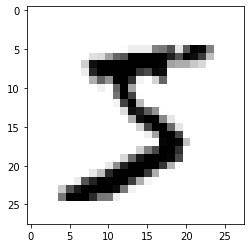

In [ ]:
plt.imshow(some_digit_image, cmap=npl.cm.binary, interpolation='nearest')
plt.axis("on")
# plt.show()

In [ ]:
y[2]

'4'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
x_train , x_test , y_train ,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

Now we were train a Classifier Using Binary Classifier


In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
h=sgd_clf.fit(x_train, y_train_5)

In [ ]:
pred=sgd_clf.predict(x_train)

In [ ]:
some_digit.shape

(784,)

In [ ]:
sum(pred==y_train_5)/60000 #For predict an Accuracy of our model.

0.9522666666666667

In [ ]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [ ]:
sgd_clf.predict(x[:20])#By this line we were check that whether we were able to predict 5 in training set perfectly or not


array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

Now we measure performance of our model that is essential part in Machine Learning Model.

In [ ]:
#implement cross validation method
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
#skfolds = StratifiedKFold(n_splits=(x_train,y_train_5))
for train_index, test_index in skfolds.split(x_train,y_train_5):
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train.iloc[train_index]
  y_train_folds = y_train_5[train_index]
  x_test_fold = x_train.iloc[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred = clone_clf.predict(x_train_folds)#,y_train_folds
  n_correct = sum(y_pred == y_train_folds)
  print(n_correct/len(y_pred))




0.9705
0.91645
0.9715


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
      pass
    def predict(self, x):
      return np.zeros((len(x), 1), dtype=bool)  

In [ ]:
#guess model accuracy by below code
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train , y_train_5, cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
#Precision
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Precision/Recall Tradeoff

In [ ]:
y_score = sgd_clf.decision_function([some_digit])
y_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8099
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred#on what behalf this threshold return true and false

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

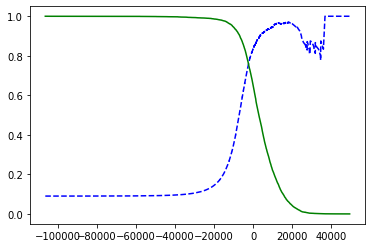

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls ,thresholds)
plt.show()

Reciever operatimg characterstic(ROC curve)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') 

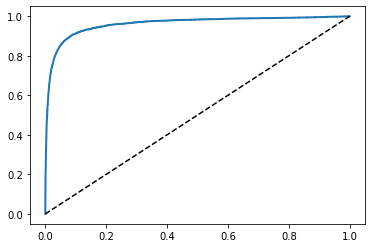

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616